In [1]:
#Differentiable Programming Part 1 -  Mainz Institute for Theoretical Physics - https://www.youtube.com/watch?v=9OvU9T2-pNs&list=WL&index=62

In [2]:
!pip install torch
!pip install matplotlib
!pip install numpy

In [35]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def generate_data(N):
    X = torch.randint(0,9, size = (N, 10))
    num2s = torch.count_nonzero(X == 2, dim = -1)
    num4s = torch.count_nonzero(X == 4, dim = -1)

    labels = (num4s > num2s)

    return X, labels

X, y = generate_data(123)

In [36]:
class AttentionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.query = torch.nn.Parameter(torch.randn(1,16))
        self.embed_func = torch.nn.Embedding(10, embedding_dim=16)
        self.key_func = torch.nn.Linear(16,16)

        self.value_func = torch.nn.Sequential(
            torch.nn.Linear(16,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,1)
        )

        self.head_mlp = torch.nn.Sequential(
            torch.nn.Linear(1,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,1),
            torch.nn.Sigmoid()
        )

    def forward(self, X):
            embedX = self.embed_func(X)
            keys = self.key_func(embedX)
            qk=torch.einsum('ie, bje -> bij', self.query, keys)
            qk = qk / 16**0.5
            att = torch.nn.functional.softmax(qk, dim = -1)

            vals = self.value_func(embedX)
            summary = torch.einsum('bij, bje->bie', att, vals)[:,0,:]
            pred = self.head_mlp(summary)

            return pred, att, vals

(array([ 3.,  5., 12., 21., 26., 20., 19.,  8.,  5.,  4.]),
 array([0.35346076, 0.3567875 , 0.36011422, 0.36344096, 0.36676767,
        0.37009442, 0.37342116, 0.37674788, 0.38007462, 0.38340133,
        0.38672808]),
 <BarContainer object of 10 artists>)

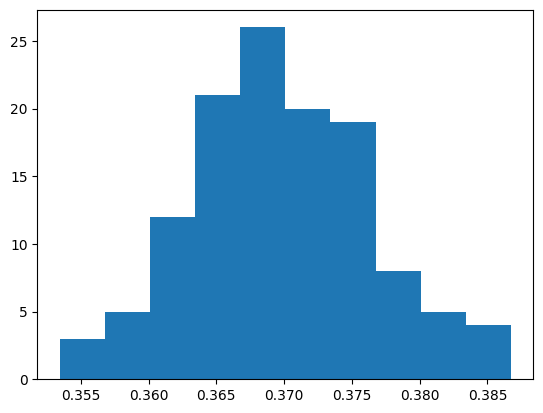

In [37]:
model = AttentionModel()

X, y = generate_data(123)
p, a, v = model(X)

plt.hist(p.detach().ravel())